In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
y_train = df_train['label'].values
df_train = df_train.drop(columns='label') 
x_train = df_train.values

In [5]:
x_train = np.reshape(x_train, (-1, 28, 28))
x_train.shape

(42000, 28, 28)

In [6]:
x_train = x_train / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
x_train = np.expand_dims(x_train, axis=3)
print( x_train.shape )

(42000, 28, 28, 1)


In [7]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

his = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.2)

D:\Conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8860 - loss: 0.3713 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9815 - val_loss: 0.0632
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9908 - loss: 0.0314 - val_accuracy: 0.9833 - val_loss: 0.0524
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9875 - val_loss: 0.0425
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9949 - loss: 0.0150 - val_accuracy: 0.9888 - val_loss: 0.0393


In [8]:
x_test = df_test.values
x_test = np.reshape(x_test, (-1, 28, 28))
x_test = np.expand_dims(x_test, axis=3)
log = model.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [9]:
df = pd.DataFrame(data={"ImageId": range(1,28001), 
                        "Label": [np.where(a == np.max(a))[0][0] for a in log]})
df.to_csv("./answer.csv", sep=',',index=False)

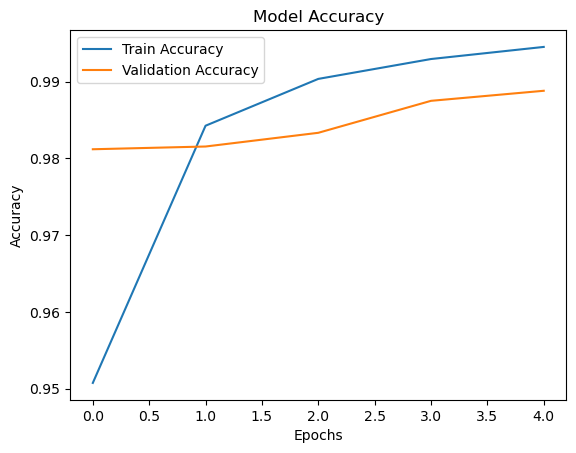

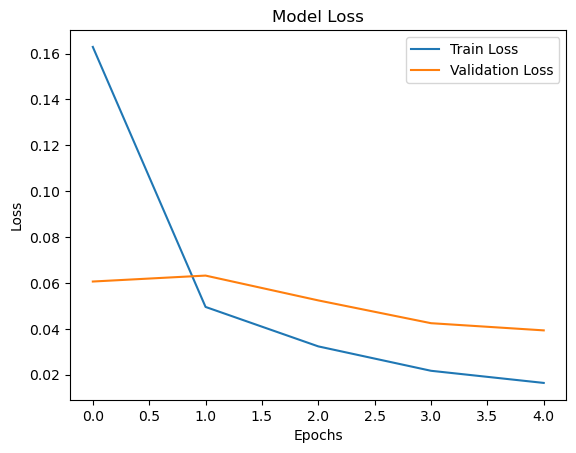

In [10]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'], label='Train Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()